<a href="https://colab.research.google.com/github/Kim-yongbeom/machine-learning/blob/main/data12/%EC%A7%91%EA%B0%92%EC%98%88%EC%B8%A1_%EC%8B%9C%EA%B3%84%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [366]:
from google.colab.patches import cv2_imshow

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [368]:
house_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house.csv')
house_df

,Unnamed: 0,datesold,price,bedrooms
0,0,2007-02-07,525000,4
1,1,2007-02-27,290000,3
2,2,2007-03-07,328000,3
3,3,2007-03-09,380000,4
4,4,2007-03-21,310000,3
...,...,...,...,...
29575,29575,2019-07-25,500000,3
29576,29576,2019-07-25,560000,2
29577,29577,2019-07-26,464950,2
29578,29578,2019-07-26,589000,2


In [369]:
del(house_df['Unnamed: 0'])
house_df

,datesold,price,bedrooms
0,2007-02-07,525000,4
1,2007-02-27,290000,3
2,2007-03-07,328000,3
3,2007-03-09,380000,4
4,2007-03-21,310000,3
...,...,...,...
29575,2019-07-25,500000,3
29576,2019-07-25,560000,2
29577,2019-07-26,464950,2
29578,2019-07-26,589000,2


In [370]:
house_df = house_df[house_df['bedrooms']==4]
del(house_df['bedrooms'])
house_df['datesold'] = pd.to_datetime(house_df['datesold'])
house_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datesold,price
0,2007-02-07,525000
3,2007-03-09,380000
5,2007-04-04,465000
7,2007-04-30,1530000
12,2007-06-27,850000
...,...,...
28188,2017-12-13,680000
28304,2018-02-05,535000
28424,2018-03-13,645000
28772,2018-07-04,300000


In [371]:
house_train_df = house_df.iloc[:10437]
len(house_train_df)

10437

In [372]:
house_train_df.set_index('datesold', inplace=True)
house_train_df

,price
datesold,
2007-02-07,525000
2007-03-09,380000
2007-04-04,465000
2007-04-30,1530000
2007-06-27,850000
...,...
2016-12-12,492500
2017-04-18,405000
2017-04-27,800000


In [373]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [374]:
house_train_df.values

array([[525000],
       [380000],
       [465000],
       ...,
       [800000],
       [490000],
       [400000]])

In [375]:
model = ARIMA(house_train_df.values, order=(2, 1, 2))
model

In [376]:
model_fit = model.fit(trend='c',full_output=True, disp=True)
model_fit

In [377]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                10436
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -144888.576
Method:                       css-mle   S.D. of innovations         258949.610
Date:                Fri, 10 Dec 2021   AIC                         289789.151
Time:                        07:54:49   BIC                         289832.669
Sample:                             1   HQIC                        289803.850
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6404     13.795      1.279      0.201      -9.397      44.678
ar.L1.D.y      0.6487      0.081      8.031      0.000       0.490       0.807
ar.L2.D.y     -0.0713      0.019     -3.739      0.000      -0.109      -0.034
ma.L1.D.y     -1.4536      0.080    -18.159      0.000      -1.610      -1.297
ma.L2.D.y      0.4558      0.080      5.719      0.000       0.300       0.612
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9670           +0.0000j            1.9670            0.0000
AR.2            7.1293           +0.0000j            7.1293            0.0000
MA.1            1.0041           +0.0000j            1.0041            0.0000
MA.2            2.1848           +0.0000j            2.1848            0.0000
-----------------------------------------------------------------------------
"""

In [378]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([683667.16180968, 734944.30062523, 747984.75041622, 752794.40869505,
        754991.76432923]),
 array([258949.61014635, 263830.73369559, 264250.03544148, 264333.17584816,
        264360.7502095 ]),
 array([[ 176135.25211214, 1191199.07150722],
        [ 217845.5645671 , 1252043.03668335],
        [ 230064.19803749, 1265905.30279494],
        [ 234710.90411357, 1270877.91327653],
        [ 236854.21499263, 1273129.31366583]]))

In [379]:
house_test_df = house_df[10437:]
house_test_df

,datesold,price
28188,2017-12-13,680000
28304,2018-02-05,535000
28424,2018-03-13,645000
28772,2018-07-04,300000
29421,2019-04-26,769500


In [380]:
pred_y = forecast_data[0]
pred_y

array([683667.16180968, 734944.30062523, 747984.75041622, 752794.40869505,
       754991.76432923])

In [381]:
pred_y = pred_y.tolist()
pred_y

[683667.1618096767,
 734944.3006252263,
 747984.7504162156,
 752794.4086950507,
 754991.7643292277]

In [382]:
test_y = house_test_df.price.values.tolist()
test_y

[680000, 535000, 645000, 300000, 769500]

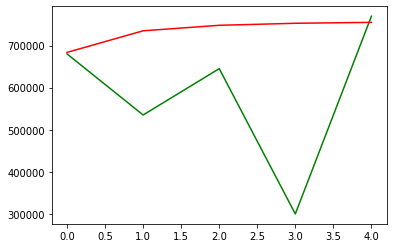

In [383]:
plt.plot(test_y,color='green')
plt.plot(pred_y,color='red')

In [384]:
from fbprophet import Prophet

In [385]:
house_df = house_df.rename(columns={'datesold':'ds','price':'y'})
house_df

,ds,y
0,2007-02-07,525000
3,2007-03-09,380000
5,2007-04-04,465000
7,2007-04-30,1530000
12,2007-06-27,850000
...,...,...
28188,2017-12-13,680000
28304,2018-02-05,535000
28424,2018-03-13,645000
28772,2018-07-04,300000


In [386]:
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)

In [387]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10442 entries, 0 to 29421
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      10442 non-null  datetime64[ns]
 1   y       10442 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 244.7 KB


In [388]:
prophet.fit(house_df)

In [389]:
# perioids = 3, freq='d' 는 3일치 데이터를 예측해서 df에 붙인다는 뜻
future_data = prophet.make_future_dataframe(periods=300,freq='d')
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2007-02-07,463646.299977,311884.781167,9.701053e+05,463646.299977,463646.299977,0.4572,0.4572,0.4572,0.361679,0.361679,0.361679,-0.081796,-0.081796,-0.081796,-0.013726,-0.013726,-0.013726,0.0,0.0,0.0,631337.277133
1,2007-03-09,460449.066660,345458.191426,9.864305e+05,460449.066660,460449.066660,0.4572,0.4572,0.4572,0.430320,0.430320,0.430320,-0.057117,-0.057117,-0.057117,0.030237,0.030237,0.030237,0.0,0.0,0.0,658589.464038
2,2007-04-04,457678.131119,337969.902201,1.007029e+06,457678.131119,457678.131119,0.4572,0.4572,0.4572,0.469535,0.469535,0.469535,-0.081796,-0.081796,-0.081796,0.094131,0.094131,0.094131,0.0,0.0,0.0,672574.109049
3,2007-04-30,454907.195578,326617.206928,9.990459e+05,454907.195578,454907.195578,0.4572,0.4572,0.4572,0.445384,0.445384,0.445384,-0.027289,-0.027289,-0.027289,0.015473,0.015473,0.015473,0.0,0.0,0.0,657515.662264
4,2007-06-27,448725.877832,242810.070553,9.159873e+05,448725.877832,448725.877832,0.4572,0.4572,0.4572,0.318888,0.318888,0.318888,-0.081796,-0.081796,-0.081796,-0.056517,-0.056517,-0.056517,0.0,0.0,0.0,591819.070230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,2020-05-18,522844.120351,424667.718611,1.091509e+06,488889.832832,551619.902978,0.4572,0.4572,0.4572,0.445301,0.445301,0.445301,-0.027289,-0.027289,-0.027289,0.015391,0.015391,0.015391,0.0,0.0,0.0,755667.368150
3355,2020-05-19,522784.166991,375222.160720,1.041907e+06,488629.349282,551740.408980,0.4572,0.4572,0.4572,0.377287,0.377287,0.377287,-0.089677,-0.089677,-0.089677,0.009763,0.009763,0.009763,0.0,0.0,0.0,720023.665284
3356,2020-05-20,522724.213631,387951.817035,1.066654e+06,488368.865732,551854.967335,0.4572,0.4572,0.4572,0.379511,0.379511,0.379511,-0.081796,-0.081796,-0.081796,0.004106,0.004106,0.004106,0.0,0.0,0.0,721103.612981
3357,2020-05-21,522664.260271,384448.379416,1.047252e+06,488108.382182,551969.525689,0.4572,0.4572,0.4572,0.382545,0.382545,0.382545,-0.073214,-0.073214,-0.073214,-0.001441,-0.001441,-0.001441,0.0,0.0,0.0,722606.773518


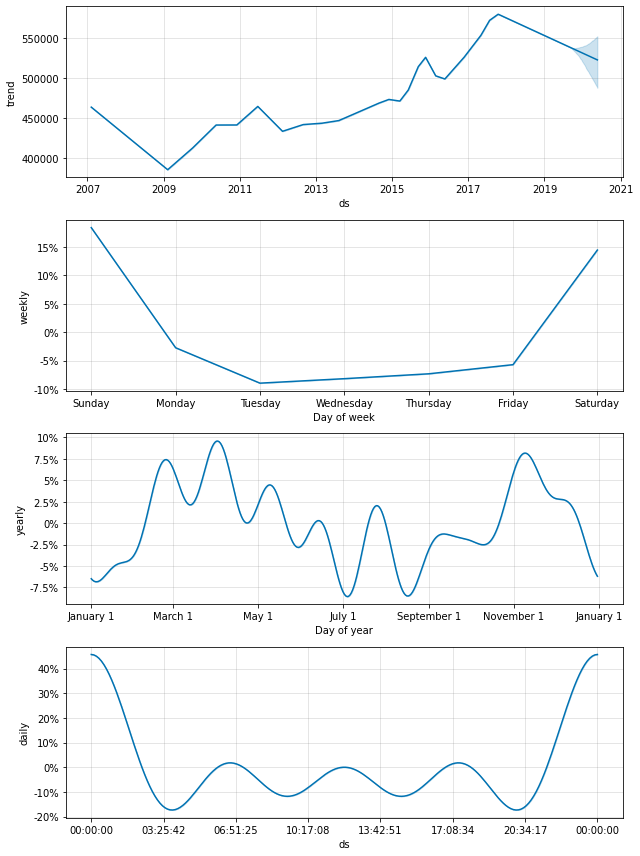

In [390]:
fig2 = prophet.plot_components(forecast_data)

In [391]:
# 화요일에 집값이 가장 낮고, 주말엔 집값이 올라간다.
# 봄에 집값이 비싼 경향이 있다.
# 2009년 이후 집값이 눈에 띄게 올라감.
# 11월이후 1월까지 집값이 쭉떨어지고 1월이후에 다시 상승하는 모습을 보여주며 16~17년 그래프를 보아 그래프 경향이 현재 20~21년도에 상승
# 2015년~2018년 집값 급증

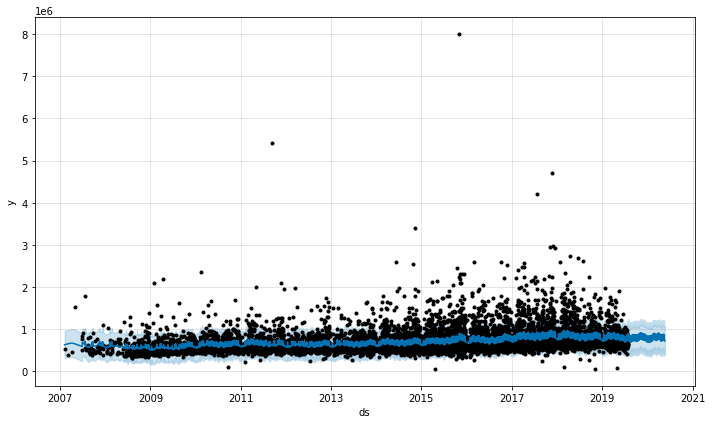

In [392]:
fig1 = prophet.plot(forecast_data)